In [3]:
%load_ext autoreload
%autoreload 2
import chainer
import os
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import PIL
import ronan

In [5]:
data = ronan.load_cats_datasets()

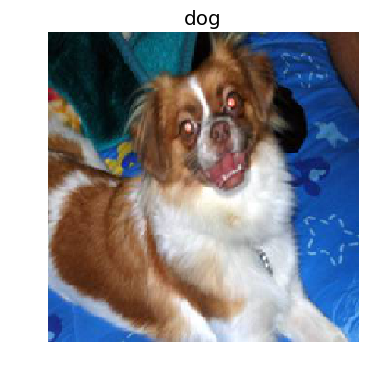

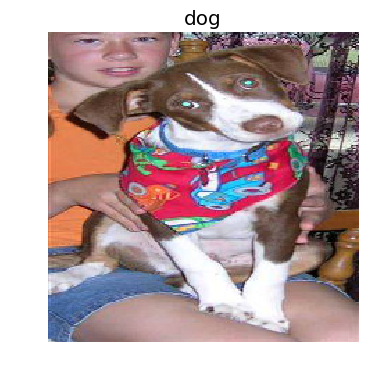

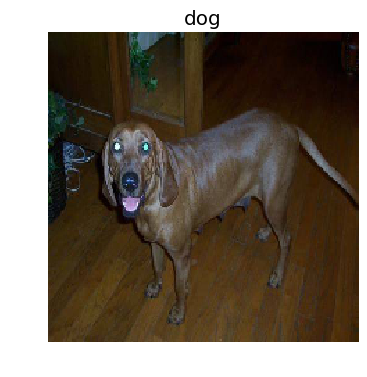

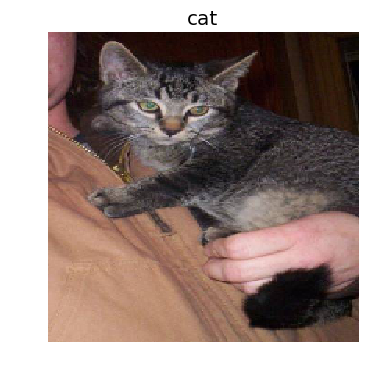

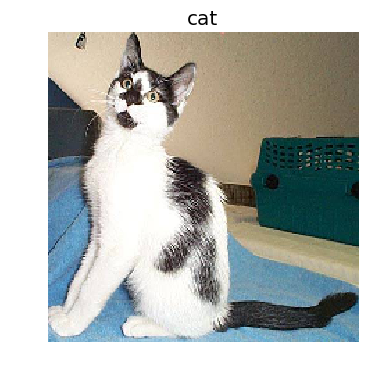

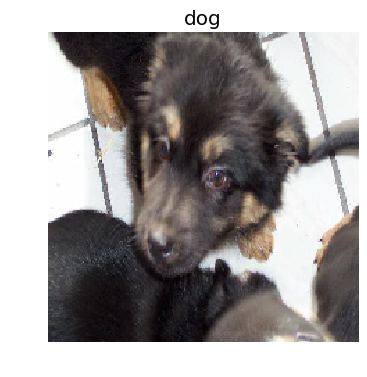

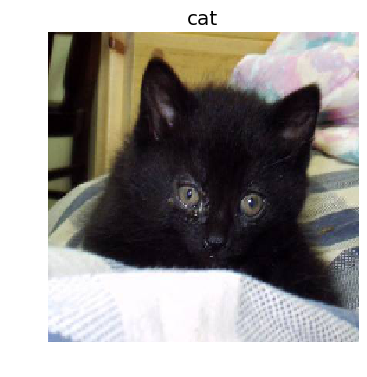

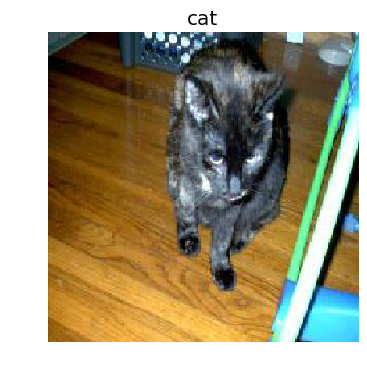

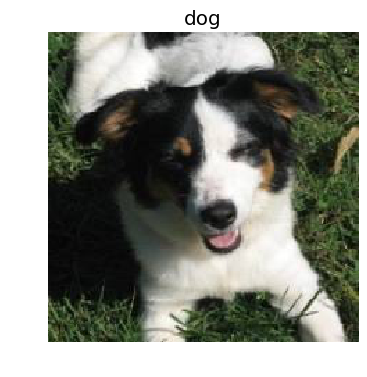

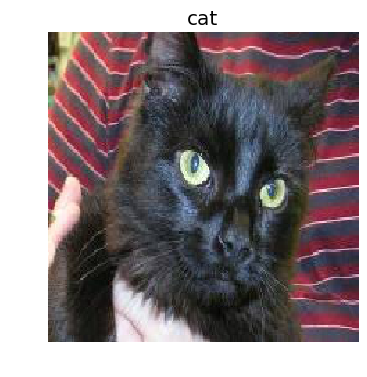

In [11]:
%autoreload 2
for i in range(10):
    ronan.plot_dataset_image(data.train[i])

In [13]:
resnet = ronan.ResNet50()

In [16]:
ronan.train(resnet, data, 'resnet50-finetune')

elapsed_time  epoch       iteration   main/accuracy  validation/main/accuracy  main/loss   validation/main/loss
5.29729       0           2           0.966797                                 0.0927876                         
10.7808       0           4           0.9375                                   0.144641                          
16.2728       0           6           0.960938                                 0.103866                          
21.774        0           8           0.96875                                  0.0831687                         
27.2818       0           10          0.972656                                 0.0855906                         
32.8349       0           12          0.976562                                 0.0817261                         
38.5485       0           14          0.972656                                 0.0833258                         
44.0479       0           16          0.982422                                 0.0527944  

In [22]:
prediction = ronan.predict(resnet, data)

25it [02:18,  5.56s/it]                        


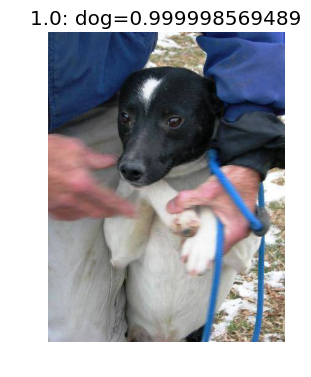

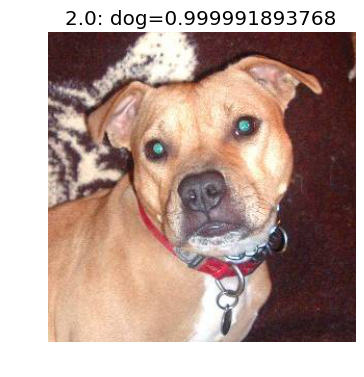

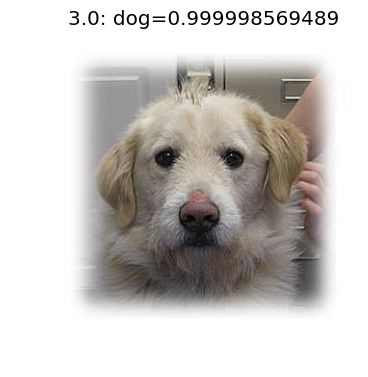

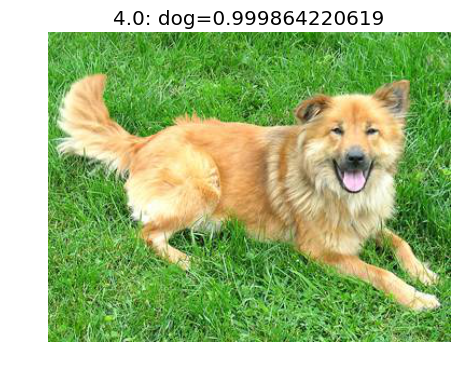

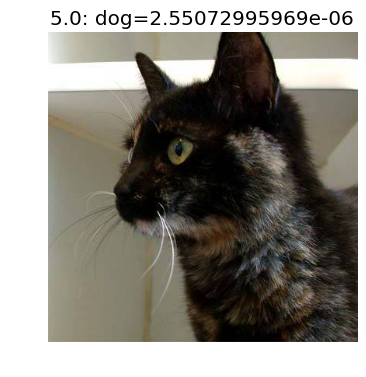

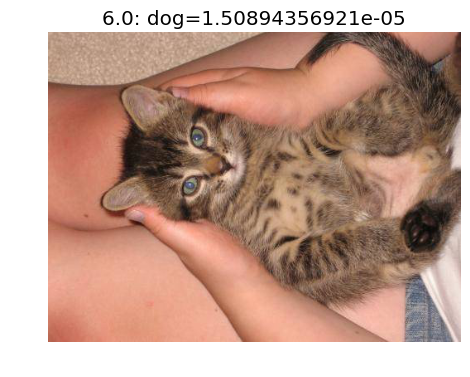

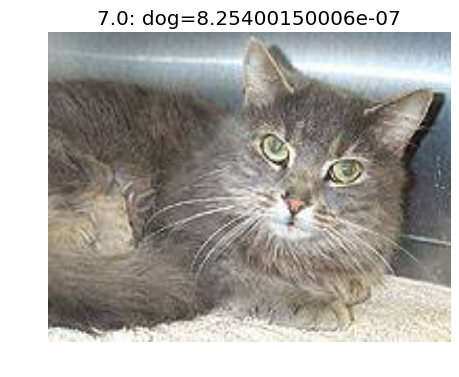

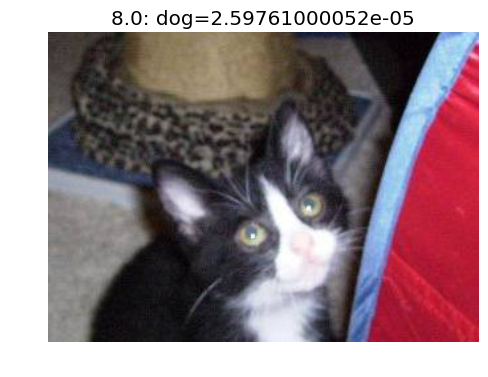

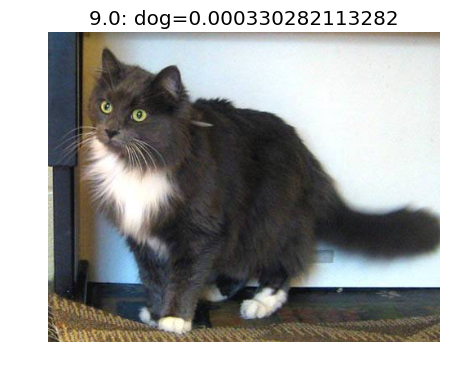

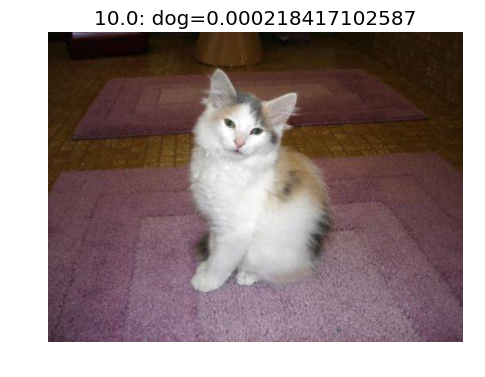

In [25]:
ronan.plot_prediction(prediction, data, 10)

In [26]:
prediction.to_csv('resnet50-finetune-prediction.csv', index=False)

In [27]:
#!kg submit -m 'now only finetuning on the last layer, 10 epochs' -c dogs-vs-cats-redux-kernels-edition -u ronanronan -p ESadLavocItcuf9 resnet50-finetune-prediction.csv
# 0.10453: position 484 = 37%

0.10453


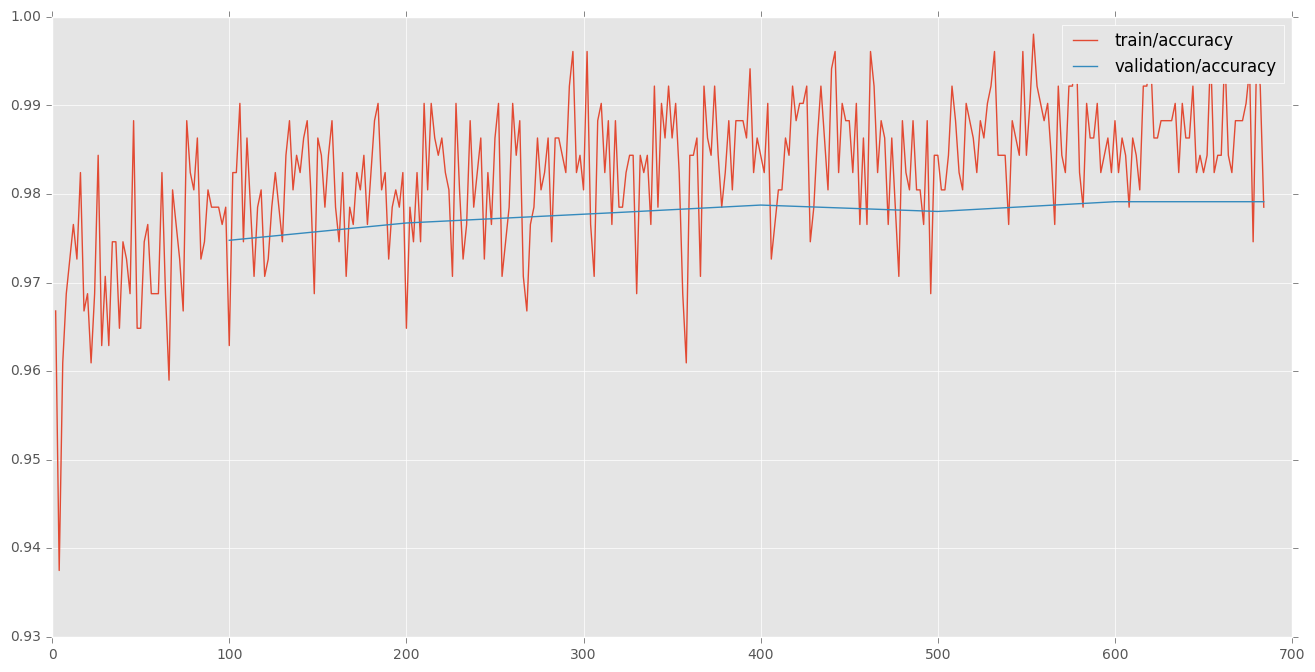

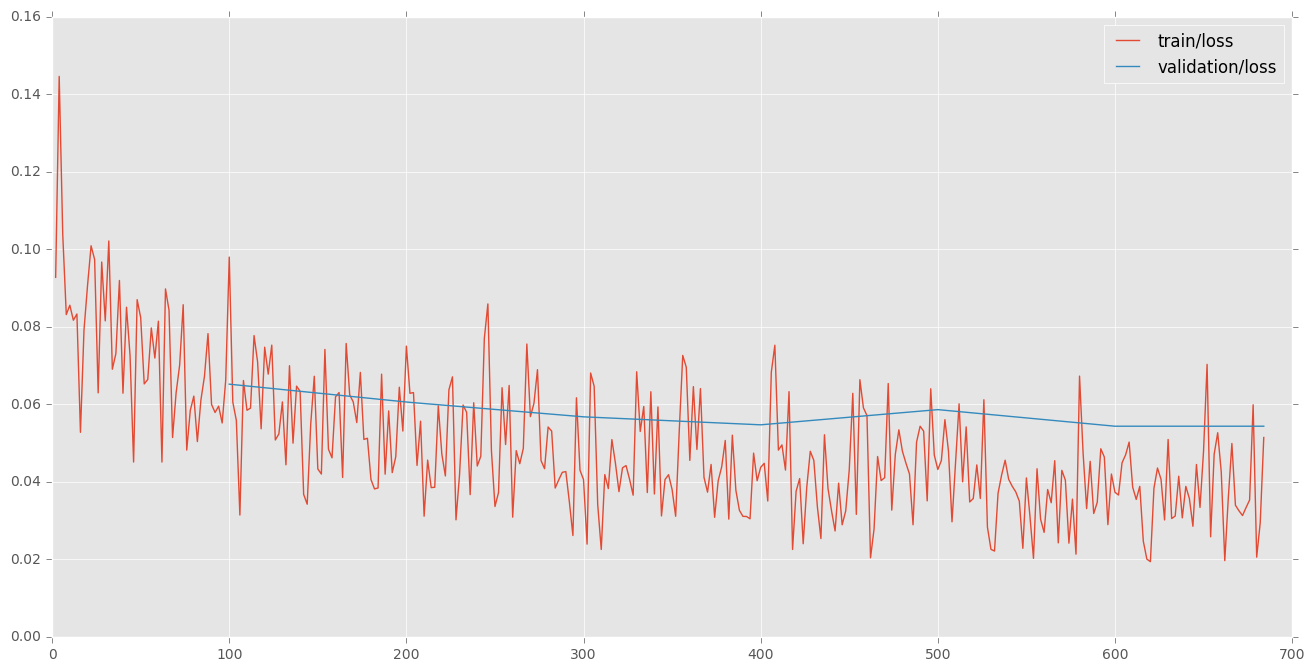

In [31]:
ronan.plot_logs('resnet50-finetune')